In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
!pip install wordcloud

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import missingno as msno

# styling
%matplotlib inline

colors = ['#E50914', '#B81D24', '#221F1F', '#F5F5F1']

In [5]:
df = pd.read_csv('netflix_titles_nov_2019.csv')

df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [7]:
pd.DataFrame(df.nunique())

,0
show_id,5837
title,5780
director,3108
cast,5087
country,527
date_added,1092
release_year,71
rating,14
duration,194
listed_in,449


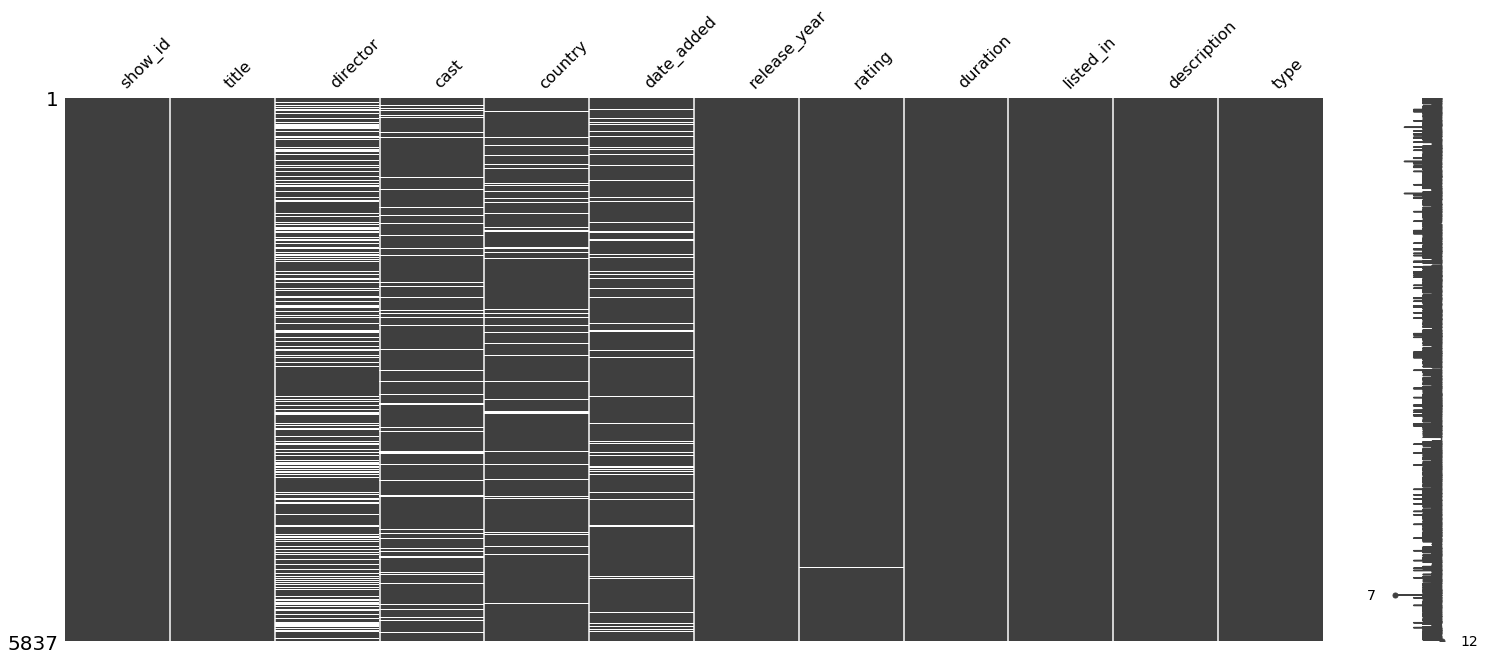

In [8]:
msno.matrix(df);

In [9]:
df.isna().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

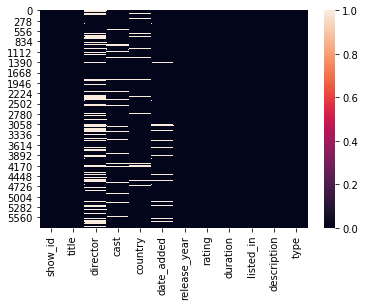

In [10]:
sns.heatmap(df.isnull())

In [11]:
df[df['title'].str.contains('Chip and Potato')]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [12]:
df[df['title'].isin(['Chip and Potato'])]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [13]:
df.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object

In [14]:
#Year wise releases in netflix
df["date_added"] = pd.to_datetime(df["date_added"])
df["release_year"]=df["release_year"].astype("str")

In [15]:
df["date_added"].dt.year.value_counts()

2019.0    1843
2018.0    1629
2017.0    1184
2016.0     412
2015.0      74
2014.0      19
2011.0      13
2013.0       9
2012.0       7
2009.0       2
2008.0       2
2010.0       1
Name: date_added, dtype: int64

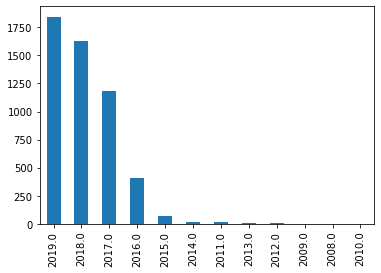

In [16]:
df["date_added"].dt.year.value_counts().plot(kind = 'bar')

In [17]:
df.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


In [18]:
#bar graph for all the movies ans TV shows
df.groupby('type').type.count()

type
Movie      3939
TV Show    1898
Name: type, dtype: int64

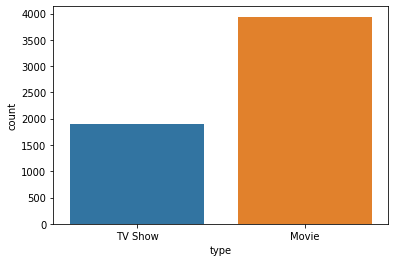

In [19]:
sns.countplot(df['type'])

In [20]:
df.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


In [21]:
#All the movies released in 2019
df[(df['type'] == 'Movie') & (df['release_year'] == '2019')]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
16,81033086,Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Lo...",United States,2019-11-28,2019,TV-PG,94 min,"Children & Family Movies, Dramas",A widowed radio DJ and his four spoiled kids n...,Movie
...,...,...,...,...,...,...,...,...,...,...,...,...
2023,81050190,Deadly Switch,Svetlana Cvetko,"Teri Polo, Dylan Walsh, Danika Yarosh, Hayley ...",United States,2019-01-15,2019,TV-PG,86 min,"Independent Movies, Thrillers","In this indie thriller, a foreign exchange stu...",Movie
2032,80218104,Sebastian Maniscalco: Stay Hungry,Rik Reinholdtsen,Sebastian Maniscalco,United States,2019-01-15,2019,TV-MA,65 min,Stand-Up Comedy,Sebastian Maniscalco brings an acerbically uni...,Movie
2049,80191048,ReMastered: Massacre at the Stadium,Bent-Jorgen Perlmutt,NaN,NaN,2019-01-11,2019,TV-MA,65 min,"Documentaries, Music & Musicals",The shocking murder of singer Victor Jara in 1...,Movie
2053,80202273,The Last Laugh,Greg Pritikin,"Chevy Chase, Richard Dreyfuss, Andie MacDowell...",United States,2019-01-11,2019,TV-MA,99 min,"Comedies, Dramas","After moving to a retirement home, restless ta...",Movie


In [22]:
#Top 10 directors who gave the highest number of TV shows and Movies in Netflix

df.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


In [23]:
df['director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           8
Martin Scorsese            8
Johnnie To                 8
Ryan Polito                7
Shannon Hartman            7
S.S. Rajamouli             7
Name: director, dtype: int64

In [24]:
df.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


In [25]:
netflix_india_movie = df[(df['type'] == 'Movie') & (df['country'] == 'India')].reset_index()
    
netflix_india_movie

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
1,24,81194544,Evvarikee Cheppoddu,Basava Shankar Eeday,"Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D P...",India,2019-11-27,2019,TV-14,134 min,"Comedies, International Movies, Romantic Movies",When caste differences throw a wrench into the...,Movie
2,34,81215481,Pranaam,Sanjiv Jaiswal,"Rajeev Khandelwal, Samiksha Singh, S.M. Zaheer...",India,2019-11-25,2019,TV-MA,117 min,"Action & Adventure, Dramas, International Movies",Aspiring to fulfill his father’s dream and bec...,Movie
3,69,81217738,Dorasaani,KVR Mahendra,"Anand Deverakonda, Shivatmika Rajasekhar, Kann...",India,2019-11-20,2019,TV-14,134 min,"Dramas, International Movies, Romantic Movies",A village landlord's daughter and an educated ...,Movie
4,78,81217739,Mallesham,Raj R,"Jhansi, Priyadarshi Pullikonda, Ananya Nagalla",India,2019-11-20,2019,TV-PG,131 min,"Dramas, Independent Movies, International Movies","A self-trained engineer risks debt, love and r...",Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,5407,70153553,Harud,Aamir Bashir,"Mohammad Amir Naji, Shahnawaz Bhat, Shamim Bas...",India,2016-10-01,2010,TV-14,100 min,"Dramas, International Movies",A young Kashmiri man sets out to escape to Pak...,Movie
641,5420,80038288,Umrika,Prashant Nair,"Suraj Sharma, Tony Revolori, Smita Tambe, Adil...",India,2016-10-01,2015,TV-14,96 min,"Dramas, Independent Movies, International Movies",An ambitious man leaves his small Indian villa...,Movie
642,5478,80115686,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2016-08-20,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,Movie
643,5485,80115844,John & Jane,Ashim Ahluwalia,NaN,India,2016-08-15,2005,TV-14,79 min,"Documentaries, International Movies",Truth and fiction blend in this quasi-document...,Movie


In [26]:
netflix_US_movie = df[(df['type'] == 'Movie') & (df['country'] == 'United States')].reset_index()
    
netflix_US_movie

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,16,81033086,Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Lo...",United States,2019-11-28,2019,TV-PG,94 min,"Children & Family Movies, Dramas",A widowed radio DJ and his four spoiled kids n...,Movie
1,23,70101696,Defiance,Edward Zwick,"Daniel Craig, Liev Schreiber, Jamie Bell, Alex...",United States,2019-11-27,2008,R,137 min,"Action & Adventure, Dramas",In this action-packed drama based on an extrao...,Movie
2,27,80175798,The Irishman,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,2019-11-27,2019,R,209 min,Dramas,Hit man Frank Sheeran looks back at the secret...,Movie
3,28,81062293,Mike Birbiglia: The New One,Seth Barrish,Mike Birbiglia,United States,2019-11-26,2019,TV-MA,86 min,Stand-Up Comedy,Comedian Mike Birbiglia hits Broadway with a h...,Movie
4,29,80235524,Super Monsters Save Christmas,Steve Ball,"Elyse Maloway, Vincent Tong, Erin Mathews, And...",United States,2019-11-26,2019,TV-Y,24 min,Children & Family Movies,"It's Christmas Eve in Pitchfork Pines, and the...",Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,5829,70206826,Victim of Beauty,Roger Young,"William Devane, Jeri Ryan, Michele Abrams, Nic...",United States,2011-10-01,1991,NR,93 min,"Dramas, Thrillers",A beauty pageant winner is stalked by a serial...,Movie
1371,5830,60003155,Joseph: King of Dreams,"Rob LaDuca, Robert C. Ramirez","Ben Affleck, Mark Hamill, Richard Herd, Mauree...",United States,2011-09-27,2000,TV-PG,75 min,"Children & Family Movies, Dramas, Faith & Spir...",With his gift of dream interpretation and his ...,Movie
1372,5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
1373,5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie


In [27]:
netflix_US_Show = df[(df['type'] == 'TV Show') & (df['country'] == 'United States')].reset_index()
netflix_US_Show

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,11,81094391,Sugar Rush Christmas,NaN,"Hunter March, Candace Nelson, Adriano Zumbo",United States,2019-11-29,2019,TV-PG,1 Season,Reality TV,"It's everything you love about ""Sugar Rush"" – ...",TV Show
1,15,80990849,The Movies That Made Us,NaN,NaN,United States,2019-11-29,2019,TV-MA,1 Season,Docuseries,These blockbusters brought us together and gav...,TV Show
2,19,80997965,Merry Happy Whatever,NaN,"Dennis Quaid, Bridgit Mendler, Brent Morin, As...",United States,2019-11-28,2019,TV-PG,1 Season,TV Comedies,A struggling LA musician tries to win over his...,TV Show
3,22,81002391,Broken,NaN,NaN,United States,2019-11-27,2019,TV-14,1 Season,Docuseries,This investigative docuseries shows how neglig...,TV Show
4,33,80241855,Dirty John,NaN,"Connie Britton, Eric Bana, Juno Temple, Julia ...",United States,2019-11-25,2018,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Mysteries",Businesswoman Debra Newell's life unravels whe...,TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,5809,70143836,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,NaT,2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,TV Show
528,5810,70259784,DreamWorks Happy Holidays from Madagascar,NaN,"Tom McGrath, Chris Miller, Christopher Knights...",United States,2013-04-01,2005,TV-PG,1 Season,"Kids' TV, TV Comedies",Madagascar goes wild with holiday spirit in th...,TV Show
529,5815,70242630,DreamWorks Shrek's Swamp Stories,NaN,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States,2012-08-17,2008,TV-PG,1 Season,"Kids' TV, TV Action & Adventure, TV Comedies","Shrek celebrates Halloween, Puss in Boots is c...",TV Show
530,5816,70242629,DreamWorks How to Train Your Dragon Legends,NaN,"Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States,2012-07-20,2011,TV-PG,1 Season,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","In this set of shorts, Hiccup and the gang lea...",TV Show


In [28]:
#Indiamovie and TV shows
India_net = df[df['country'] == 'India'].reset_index()
India_net

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
1,24,81194544,Evvarikee Cheppoddu,Basava Shankar Eeday,"Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D P...",India,2019-11-27,2019,TV-14,134 min,"Comedies, International Movies, Romantic Movies",When caste differences throw a wrench into the...,Movie
2,34,81215481,Pranaam,Sanjiv Jaiswal,"Rajeev Khandelwal, Samiksha Singh, S.M. Zaheer...",India,2019-11-25,2019,TV-MA,117 min,"Action & Adventure, Dramas, International Movies",Aspiring to fulfill his father’s dream and bec...,Movie
3,69,81217738,Dorasaani,KVR Mahendra,"Anand Deverakonda, Shivatmika Rajasekhar, Kann...",India,2019-11-20,2019,TV-14,134 min,"Dramas, International Movies, Romantic Movies",A village landlord's daughter and an educated ...,Movie
4,78,81217739,Mallesham,Raj R,"Jhansi, Priyadarshi Pullikonda, Ananya Nagalla",India,2019-11-20,2019,TV-PG,131 min,"Dramas, Independent Movies, International Movies","A self-trained engineer risks debt, love and r...",Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,5407,70153553,Harud,Aamir Bashir,"Mohammad Amir Naji, Shahnawaz Bhat, Shamim Bas...",India,2016-10-01,2010,TV-14,100 min,"Dramas, International Movies",A young Kashmiri man sets out to escape to Pak...,Movie
693,5420,80038288,Umrika,Prashant Nair,"Suraj Sharma, Tony Revolori, Smita Tambe, Adil...",India,2016-10-01,2015,TV-14,96 min,"Dramas, Independent Movies, International Movies",An ambitious man leaves his small Indian villa...,Movie
694,5478,80115686,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2016-08-20,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,Movie
695,5485,80115844,John & Jane,Ashim Ahluwalia,NaN,India,2016-08-15,2005,TV-14,79 min,"Documentaries, International Movies",Truth and fiction blend in this quasi-document...,Movie


In [29]:
India_net.groupby('type').type.count()

type
Movie      645
TV Show     52
Name: type, dtype: int64

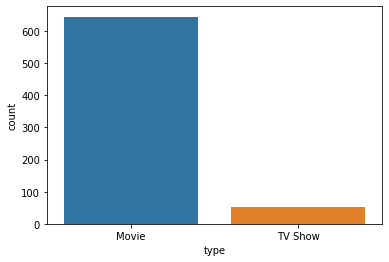

In [30]:
sns.countplot(India_net['type'])

In [31]:
#10 oldest movies on Netflix

In [32]:
old_content = df.sort_values('release_year', ascending= 'True')
old_content = old_content[old_content['duration'] != ""]
old_content[['title', "release_year"]][:10]

,title,release_year
2154,Pioneers: First Women Filmmakers*,1925
4929,Prelude to War,1942
4931,The Battle of Midway,1942
4946,WWII: Report from the Aleutians,1943
4943,Why We Fight: The Battle of Russia,1943
4941,Undercover: How to Operate Behind Enemy Lines,1943
4936,The Memphis Belle: A Story of a\nFlying Fortress,1944
4938,The Negro Soldier,1944
4940,Tunisian Victory,1944
4923,Know Your Enemy - Japan,1945
